In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statannot

In [14]:
df_end = pd.read_csv('C:/Users/Harry/Documents/GitHub/MasterThesis/Programming/analysis/dataframes/ueq_end.csv')
df_end.set_index('user_id')

df_start = pd.read_csv('C:/Users/Harry/Documents/GitHub/MasterThesis/Programming/analysis/dataframes/ueq_day2.csv')
df_start.set_index('user_id')

display(df_end)
display(df_start)

,user_id,ueq_01,ueq_02,ueq_03,ueq_04,ueq_05,ueq_06,ueq_07,ueq_08,ueq_09,...,ueq_17,ueq_18,ueq_19,ueq_20,ueq_21,ueq_22,ueq_23,ueq_24,ueq_25,ueq_26
0,p_01,6,7,2,2,3,5,5,6,3,...,2,1,2,6,1,7,1,3,3,6
1,p_02,6,5,2,3,3,5,6,5,4,...,3,4,3,5,5,5,5,3,3,6
2,p_03,6,7,2,3,2,5,6,7,3,...,4,2,2,5,3,6,2,2,2,4
3,p_04,6,7,2,1,2,5,6,4,3,...,1,4,2,6,1,7,1,2,2,5
4,p_05,6,6,2,1,2,6,6,4,2,...,2,4,2,6,2,4,2,2,2,6
5,p_06,6,7,2,1,2,6,6,6,2,...,1,2,1,6,1,5,2,2,2,6
6,p_07,6,5,4,3,4,5,4,6,4,...,6,5,3,4,3,5,5,5,4,3
7,p_08,6,7,3,1,2,5,5,6,2,...,2,2,2,5,1,6,1,1,1,5
8,p_09,6,7,3,2,2,5,6,7,2,...,1,1,1,5,1,6,1,3,2,5
9,p_10,6,7,2,1,2,6,7,6,1,...,1,3,1,6,1,6,2,1,1,6


,user_id,ueq_01,ueq_02,ueq_03,ueq_04,ueq_05,ueq_06,ueq_07,ueq_08,ueq_09,...,ueq_17,ueq_18,ueq_19,ueq_20,ueq_21,ueq_22,ueq_23,ueq_24,ueq_25,ueq_26
0,p_01,5,7,3,2,4,5,5,4,5,...,3,1,3,4,2,7,1,4,2,6
1,p_02,5,6,2,4,3,4,5,5,3,...,3,4,2,5,2,5,3,3,3,5
2,p_03,4,6,4,2,5,3,3,7,2,...,4,2,2,4,2,4,2,4,3,4
3,p_04,5,7,3,1,3,4,6,4,3,...,3,4,4,5,2,5,2,3,2,5
4,p_05,6,6,2,1,4,5,5,6,2,...,2,4,2,6,2,4,3,3,3,6
5,p_06,6,7,3,2,2,5,5,7,1,...,1,3,2,6,1,5,2,3,2,6
6,p_07,3,4,4,2,4,3,5,2,6,...,2,4,3,2,3,3,4,4,4,3
7,p_08,7,7,3,1,2,5,5,6,2,...,2,2,1,5,2,5,1,2,1,5
8,p_09,5,7,3,2,3,5,5,7,2,...,2,2,1,4,1,5,1,3,2,5
9,p_10,7,7,2,2,1,7,7,6,2,...,1,1,2,6,1,7,1,1,2,6


# adjust values on the scale

In [15]:
def adjust_scale(value):
    return value - 4

# define scales

In [16]:
scales = {
    'attractiveness': ['ueq_01', 'ueq_12', 'ueq_14', 'ueq_16', 'ueq_24', 'ueq_25'],
    'perspicuity': ['ueq_02', 'ueq_04', 'ueq_13', 'ueq_21'],
    'efficiency': ['ueq_09', 'ueq_20', 'ueq_22', 'ueq_23'],
    'dependability': ['ueq_08', 'ueq_11', 'ueq_17', 'ueq_19'],
    'stimulation': ['ueq_05', 'ueq_06', 'ueq_07', 'ueq_18'],
    'novelty': ['ueq_03', 'ueq_10', 'ueq_15', 'ueq_26']
}

# define values to be inverted

In [17]:
invert_columns = ['ueq_03', 'ueq_04', 'ueq_05', 'ueq_09', 'ueq_10', 'ueq_12', 
                  'ueq_17', 'ueq_18', 'ueq_19', 'ueq_21', 'ueq_23', 'ueq_24', 'ueq_25']

In [18]:
def format_data(df):
    df_adjusted = pd.DataFrame(index=df.index)
    for scale, rows in scales.items():
        for row in rows:
            adjusted_row = f"{row}_adjusted"
            df_adjusted[adjusted_row] = df[row].apply(adjust_scale)
    return df_adjusted

In [19]:
def invert_data(df):
    for row in invert_columns:
        adjusted_row = f"{row}_adjusted"
        if adjusted_row in df.columns:
            df[adjusted_row] = df[adjusted_row].apply(lambda x: -x)
    return df
            

# start dataframe adjusted

In [20]:
df_start_formatted = format_data(df_start)
df_start_formatted_inverted = invert_data(df_start_formatted)
df_start_formatted_inverted = df_start_formatted_inverted.rename_axis('user_id')
display(df_start_formatted_inverted)


,ueq_01_adjusted,ueq_12_adjusted,ueq_14_adjusted,ueq_16_adjusted,ueq_24_adjusted,ueq_25_adjusted,ueq_02_adjusted,ueq_04_adjusted,ueq_13_adjusted,ueq_21_adjusted,...,ueq_17_adjusted,ueq_19_adjusted,ueq_05_adjusted,ueq_06_adjusted,ueq_07_adjusted,ueq_18_adjusted,ueq_03_adjusted,ueq_10_adjusted,ueq_15_adjusted,ueq_26_adjusted
user_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,0,2,3,2,2,2,...,1,1,0,1,1,3,1,3,3,2
1,1,1,0,1,1,1,2,0,-1,2,...,1,2,1,0,1,0,2,2,2,1
2,0,2,0,0,0,1,2,2,3,2,...,0,2,-1,-1,-1,2,0,1,1,0
3,1,2,0,1,1,2,3,3,2,2,...,1,0,1,0,2,0,1,2,1,1
4,2,2,0,2,1,1,2,3,3,2,...,2,2,0,1,1,0,2,0,3,2
5,2,2,1,2,1,2,3,2,3,3,...,3,2,2,1,1,1,1,2,2,2
6,-1,0,0,0,0,0,0,2,2,1,...,2,1,0,-1,1,0,0,0,-1,-1
7,3,2,2,1,2,3,3,3,3,2,...,2,3,2,1,1,2,1,1,1,1
8,1,1,0,0,1,2,3,2,3,3,...,2,3,1,1,1,2,1,1,1,1


# end dataframe adjusted

In [21]:
df_end_formatted = format_data(df_end)
df_end_formatted_inverted = invert_data(df_end_formatted)
df_end_formatted_inverted = df_end_formatted_inverted.rename_axis('user_id')
display(df_end_formatted_inverted)

,ueq_01_adjusted,ueq_12_adjusted,ueq_14_adjusted,ueq_16_adjusted,ueq_24_adjusted,ueq_25_adjusted,ueq_02_adjusted,ueq_04_adjusted,ueq_13_adjusted,ueq_21_adjusted,...,ueq_17_adjusted,ueq_19_adjusted,ueq_05_adjusted,ueq_06_adjusted,ueq_07_adjusted,ueq_18_adjusted,ueq_03_adjusted,ueq_10_adjusted,ueq_15_adjusted,ueq_26_adjusted
user_id,,,,,,,,,,,,,,,,,,,,,
0,2,1,0,1,1,1,3,2,2,3,...,2,2,1,1,1,3,2,3,2,2
1,2,1,1,1,1,1,1,1,1,-1,...,1,1,1,1,2,0,2,2,2,2
2,2,1,1,1,2,2,3,1,3,1,...,0,2,2,1,2,2,2,1,0,0
3,2,3,1,3,2,2,3,3,3,3,...,3,2,2,1,2,0,2,0,1,1
4,2,3,0,2,2,2,2,3,2,2,...,2,2,2,2,2,0,2,0,2,2
5,2,3,1,3,2,2,3,3,2,3,...,3,3,2,2,2,2,2,2,2,2
6,2,1,0,0,-1,0,1,1,2,1,...,-2,1,0,1,0,-1,0,-1,-1,-1
7,2,3,2,2,3,3,3,3,3,3,...,2,2,2,1,1,2,1,2,1,1
8,2,2,1,2,1,2,3,2,3,3,...,3,3,2,1,2,3,1,1,1,1


# combine per scale

In [22]:
def combine_scales(df, day_value):
    
    df_combined_scales = pd.DataFrame(index=df.index)
    
    for scale, rows in scales.items():
        adjusted_rows = [f"{spalte}_adjusted" for spalte in rows]
        df_combined_scales[scale + '_mean_' + day_value] = df[adjusted_rows].mean(axis=1).round(2)
                
    return df_combined_scales      

# scales for start

In [23]:
df_combined_scales_start = combine_scales(df_start_formatted_inverted, 'start')
display(df_combined_scales_start)

,attractiveness_mean_start,perspicuity_mean_start,efficiency_mean_start,dependability_mean_start,stimulation_mean_start,novelty_mean_start
user_id,,,,,,
0,0.83,2.25,1.25,0.50,1.25,2.25
1,0.83,0.75,1.00,1.25,0.50,1.75
2,0.50,2.25,1.00,1.50,-0.25,0.50
3,1.17,2.50,1.25,0.50,0.75,1.25
4,1.33,2.50,1.25,2.00,0.50,1.75
5,1.67,2.75,2.00,2.50,1.25,1.75
6,-0.17,1.25,-1.25,0.25,0.00,-0.50
7,2.17,2.75,1.75,2.25,1.50,1.00
8,0.83,2.75,1.50,2.25,1.25,1.00


# scales for end

In [24]:
df_combined_scales_end = combine_scales(df_end_formatted_inverted, 'end')
display(df_combined_scales_end)

,attractiveness_mean_end,perspicuity_mean_end,efficiency_mean_end,dependability_mean_end,stimulation_mean_end,novelty_mean_end
user_id,,,,,,
0,1.00,2.50,2.25,1.75,1.50,2.25
1,1.17,0.50,0.25,1.25,1.00,2.00
2,1.50,2.00,1.50,1.75,1.75,0.75
3,2.17,3.00,2.25,1.75,1.25,1.00
4,1.83,2.25,1.50,1.50,1.50,1.50
5,2.17,2.75,1.75,2.75,2.00,2.00
6,0.33,1.25,0.00,0.50,0.00,-0.75
7,2.50,3.00,2.00,2.00,1.50,1.25
8,1.67,2.75,2.00,2.75,2.00,1.00


# combining scales for plotting

In [25]:
def combine_scales_plotting(df):
    
    df_combined_scales_plotting = pd.DataFrame(index=df.index)
    
    for scale, rows in scales.items():
        adjusted_rows = [f"{spalte}_adjusted" for spalte in rows]
        df_combined_scales_plotting[scale + '_mean' ] = df[adjusted_rows].mean(axis=1).round(2)
                
    return df_combined_scales_plotting 

# means

In [26]:
df_combined_scales_start_plotting = combine_scales_plotting(df_start_formatted_inverted)
df_combined_scales_end_plotting = combine_scales_plotting(df_end_formatted_inverted)

mean_start = df_combined_scales_start_plotting.mean()
mean_end = df_combined_scales_end_plotting.mean()
means_combined = pd.DataFrame({
    'start' : mean_start,
    'end' : mean_end
})
#means_combined.index.name = 'scales'

display(means_combined)

,start,end
attractiveness_mean,1.305833,1.834167
perspicuity_mean,2.333333,2.375000
efficiency_mean,1.333333,1.645833
dependability_mean,1.604167,1.937500
stimulation_mean,1.166667,1.562500
novelty_mean,1.437500,1.500000


In [27]:
df_start_tidy = df_combined_scales_start_plotting.copy()
display(df_start_tidy)

df_end_tidy = df_combined_scales_end_plotting.copy()
display(df_end_tidy)

,attractiveness_mean,perspicuity_mean,efficiency_mean,dependability_mean,stimulation_mean,novelty_mean
user_id,,,,,,
0,0.83,2.25,1.25,0.50,1.25,2.25
1,0.83,0.75,1.00,1.25,0.50,1.75
2,0.50,2.25,1.00,1.50,-0.25,0.50
3,1.17,2.50,1.25,0.50,0.75,1.25
4,1.33,2.50,1.25,2.00,0.50,1.75
5,1.67,2.75,2.00,2.50,1.25,1.75
6,-0.17,1.25,-1.25,0.25,0.00,-0.50
7,2.17,2.75,1.75,2.25,1.50,1.00
8,0.83,2.75,1.50,2.25,1.25,1.00


,attractiveness_mean,perspicuity_mean,efficiency_mean,dependability_mean,stimulation_mean,novelty_mean
user_id,,,,,,
0,1.00,2.50,2.25,1.75,1.50,2.25
1,1.17,0.50,0.25,1.25,1.00,2.00
2,1.50,2.00,1.50,1.75,1.75,0.75
3,2.17,3.00,2.25,1.75,1.25,1.00
4,1.83,2.25,1.50,1.50,1.50,1.50
5,2.17,2.75,1.75,2.75,2.00,2.00
6,0.33,1.25,0.00,0.50,0.00,-0.75
7,2.50,3.00,2.00,2.00,1.50,1.25
8,1.67,2.75,2.00,2.75,2.00,1.00


# tidy data for error bars in plot

In [ ]:

df_start_tidy_copy = df_start_tidy.copy()
df_end_tidy_copy = df_end_tidy.copy()

#df_start_tidy_copy = df_start_tidy_copy.drop(columns=['user_id'])
#df_end_tidy_copy = df_end_tidy_copy.drop(columns=['user_id'])
#display(df_start_tidy_copy)
#display(df_end_tidy_copy)

# as user_id columns are the index columns in the underlying dataframes these are needed as normal columns -> reset_index()
df_start_tidy_copy = df_start_tidy_copy.reset_index()
df_end_tidy_copy = df_end_tidy_copy.reset_index()

df_start_tidy_melt = df_start_tidy_copy.melt(id_vars='user_id', var_name='scale', value_name='value')

df_end_tidy_melt = df_end_tidy_copy.melt(id_vars='user_id', var_name='scale', value_name='value')


df_tidy_both = pd.concat([df_start_tidy_melt, df_end_tidy_melt]).sort_values(by=['user_id', 'scale']).reset_index(drop=True)
#.sort_values(by=['user_id', 'scale'])

df_tidy_both['condition'] = ['start' if i % 2 == 0 else 'end' for i in range(len(df_tidy_both))]

#scales_order = df_start_tidy_copy.columns[0:]
#df_tidy_both['scale'] = pd.Categorical(df_tidy_both['scale'], categories=scales_order, ordered=True)

df_tidy_both = df_tidy_both.sort_values(by=['user_id', 'scale']).reset_index(drop=True)

display(df_tidy_both.head(30))

,user_id,scale,value,condition
0,0,attractiveness_mean,0.83,start
1,0,attractiveness_mean,1.00,end
2,0,dependability_mean,0.50,start
3,0,dependability_mean,1.75,end
4,0,efficiency_mean,1.25,start
5,0,efficiency_mean,2.25,end
6,0,novelty_mean,2.25,start
7,0,novelty_mean,2.25,end
8,0,perspicuity_mean,2.25,start
9,0,perspicuity_mean,2.50,end


# plotting
(again)

Rectangle(xy=(-0.4, 0), width=0.4, height=1.30583, angle=0) -0.4 0
Rectangle(xy=(0.6, 0), width=0.4, height=2.33333, angle=0) 0.6000000000000001 0
Rectangle(xy=(1.6, 0), width=0.4, height=1.33333, angle=0) 1.6 0
Rectangle(xy=(2.6, 0), width=0.4, height=1.60417, angle=0) 2.5999999999999996 0
Rectangle(xy=(3.6, 0), width=0.4, height=1.16667, angle=0) 3.5999999999999996 0
Rectangle(xy=(4.6, 0), width=0.4, height=1.4375, angle=0) 4.6 0
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=1.83417, angle=0) -2.7755575615628914e-17 0
Rectangle(xy=(1, 0), width=0.4, height=2.375, angle=0) 0.9999999999999999 0
Rectangle(xy=(2, 0), width=0.4, height=1.64583, angle=0) 2.0 0
Rectangle(xy=(3, 0), width=0.4, height=1.9375, angle=0) 3.0 0
Rectangle(xy=(4, 0), width=0.4, height=1.5625, angle=0) 4.0 0
Rectangle(xy=(5, 0), width=0.4, height=1.5, angle=0) 5.0 0


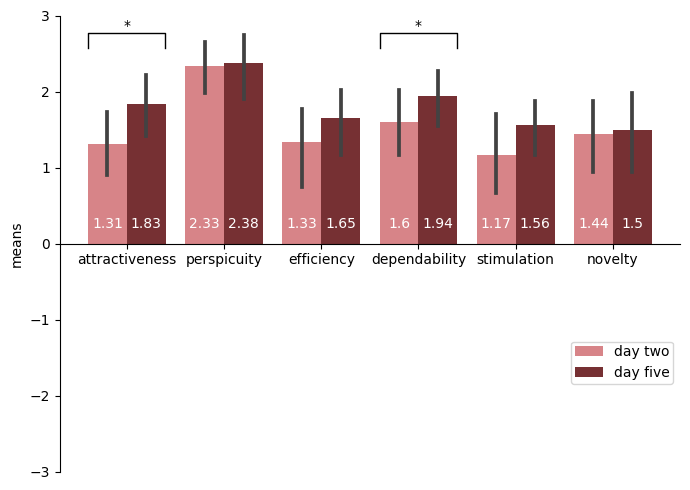

In [33]:
palette = {'start': '#E5767B', 'end': '#822428'}
plt.figure(figsize=(7,5))
sns.barplot(data=df_tidy_both, x='scale', y="value", hue='condition', palette=palette, order = ['attractiveness_mean', 'perspicuity_mean', 'efficiency_mean', 'dependability_mean', 'stimulation_mean','novelty_mean' ])
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
for p in plt.gca().patches:  
    plt.text(
        p.get_x() + p.get_width() / 2, 
        0.17, 
        round(p.get_height(), 2), 
        ha='center', 
        va='bottom', 
        color = 'white'
    )
    print(p, p.get_x(), p.get_y())
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['day two', 'day five'], title='', ncol=1, bbox_to_anchor=(1, 0.3), facecolor='white', borderpad=0.25)
ax.spines['bottom'].set_position('center')
#plt.axhline(0, color='black')
ax.set_xticklabels(['attractiveness', 'perspicuity', 'efficiency', 'dependability', 'stimulation', 'novelty'])
plt.xlabel('')
plt.ylabel('means')
plt.ylim(-3, 3)  
plt.tight_layout()

#x1 = -0.017
x1 = -0.4
x2 = 0.397
#y= 1.6
y= 2.57
h = 0.2
plt.plot([x1,x1, x2,x2], [y, y+h, y+h, y], lw = 1, c='black')
plt.text(0, y+h, '*', ha='center', va='bottom')


x1 = 2.6
x2 = 3.397
#y= 1.6
y= 2.57
h = 0.2
plt.plot([x1,x1, x2,x2], [y, y+h, y+h, y], lw = 1, c='black')
plt.text(3, y+h, '*', ha='center', va='bottom')

#x2 = 2.97
#plt.text(x2, y+h, '*')
#plt.grid(True)
plt.savefig('plots/ueq2.pdf', format='pdf')
plt.show()

# tea-test

In [32]:
from scipy import stats
from scipy.stats import ttest_ind

alpha = 0.05

columns_to_ttest = ['attractiveness_mean', 'perspicuity_mean', 'efficiency_mean',
       'dependability_mean', 'stimulation_mean', 'novelty_mean']

for column in columns_to_ttest:
    
    t_stat, p_value = stats.ttest_rel(df_combined_scales_start_plotting[column], df_combined_scales_end_plotting[column])
    display(column+'_scale', t_stat, p_value)


'attractiveness_mean_scale'

-6.4525521175509395

4.725516493002819e-05

'perspicuity_mean_scale'

-0.6158817620514396

0.5505037156037171

'efficiency_mean_scale'

-1.8501990472710828

0.09130715687657713

'dependability_mean_scale'

-2.242447642325552

0.04650141087859005

'stimulation_mean_scale'

-1.8108307969166895

0.09753567451459474

'novelty_mean_scale'

-0.8206518066482898

0.42927051417211226